In [6]:
import numpy as np
from data_load import FeedingData
from data_load import DriveDataSet, DataGenerator, AngleTypeWithZeroRecordAllocator,\
    drive_record_filter_exclude_duplicated_small_angles, drive_record_filter_include_all, drive_record_filter_exclude_zeros
from data_generators import image_itself, brightness_image_generator, shadow_generator, \
     shift_image_generator, random_generators, pipe_line_generators, pipe_line_random_generators, flip_generator
from visualization import Video, Plot
from performance_timer import Timer
from IPython.display import Image
from IPython.display import YouTubeVideo
from IPython.display import HTML
import base64

%matplotlib inline

IMG_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

def display_gif(file_name):
    data="0"
    data = open(file_name, "rb").read()
    data = base64.b64encode(data)
    tag = IMG_TAG.format(data.decode())
    return HTML(tag)

def create_real_dataset(filter_method):
    return DriveDataSet.from_csv(
        "datasets/udacity-sample-track-1/driving_log.csv",
        filter_method=filter_method,
        fake_image=True
    )

def _angle_distribution(
            name, batches, batch_size, allocator,
            left_percentage=30, right_percentage=30, angle_offset_pre_pixel=0.002, generator=None
    ):

        if generator is None:
            generator = pipe_line_random_generators(
                image_itself,
                shift_image_generator(angle_offset_pre_pixel=angle_offset_pre_pixel),
                flip_generator
            )
        data_generator = DataGenerator(allocator, generator)
        angles = np.array([])
        for index in range(batches):
            print("batch {} / {}".format(index, batches))
            _, _angles = next(data_generator.generate(batch_size=batch_size))
            angles = np.append(angles, _angles)

        plt = Plot.angle_distribution(angles)
        return plt
    

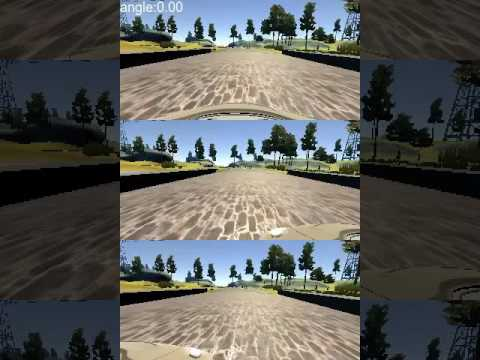

In [13]:
YouTubeVideo("LLCXS-uCMSw",width=320,height=360)

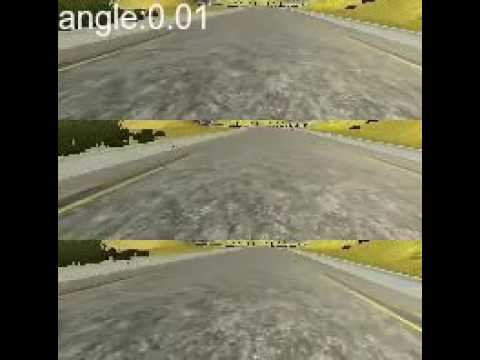

In [14]:
YouTubeVideo("pxG46j9kK0I",width=320,height=200)


[MoviePy] Building file test/resources/generator_pipe_line.gif with imageio


 95%|█████████▌| 20/21 [00:00<00:00, 137.51it/s]



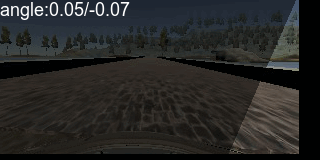

In [21]:
def test_gif_for_generator():
    dataset = DriveDataSet.from_csv("datasets/udacity-sample-track-1/driving_log.csv")

    generator = pipe_line_generators(
        image_itself,
        shift_image_generator(angle_offset_pre_pixel=0.006),
        brightness_image_generator(0.25),
        shadow_generator
    )
    Video.from_generators("test/resources/generator_pipe_line.gif", dataset[60], 20, generator)

test_gif_for_generator()
display_gif("test/resources/generator_pipe_line.gif")

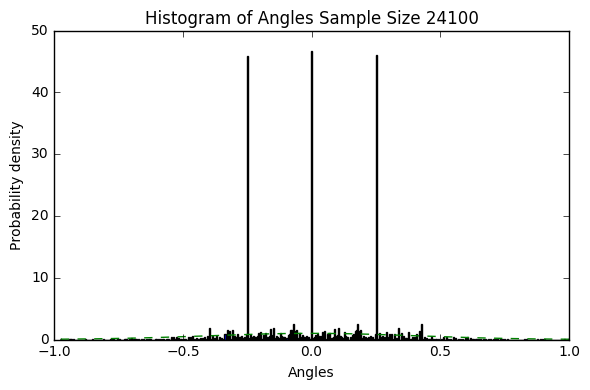

In [29]:

def test_angle_distribution():
    dataset = create_real_dataset(filter_method=drive_record_filter_include_all)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()

test_angle_distribution()

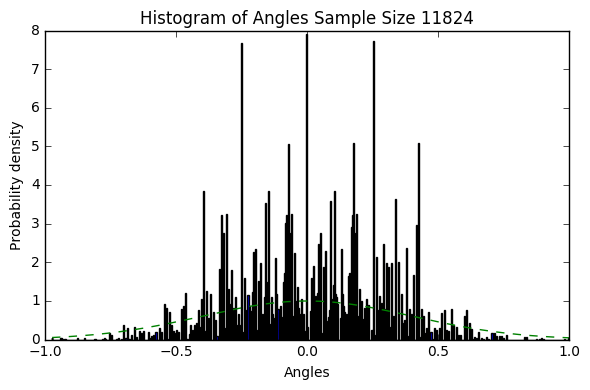

In [27]:
def test_angle_distribution_after_filterout_small_angles():
    dataset = create_real_dataset(filter_method=drive_record_filter_exclude_small_angles)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()
    
test_angle_distribution_after_filterout_small_angles()

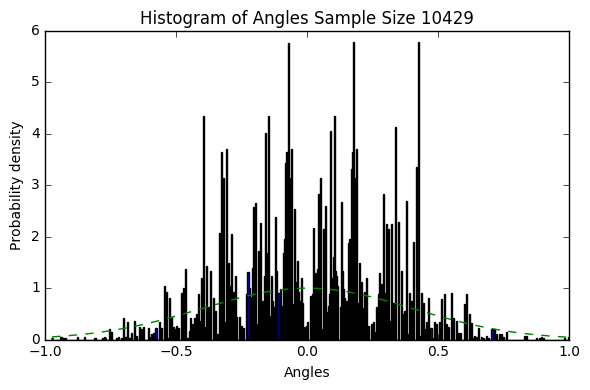

In [28]:
def test_angle_distribution_after_filterout_zeros():
    dataset = create_real_dataset(filter_method=drive_record_filter_exclude_zeros)
    plt = Plot.angle_distribution(dataset.angles())
    plt.show()

test_angle_distribution_after_filterout_zeros()

batch 0 / 100
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image retur

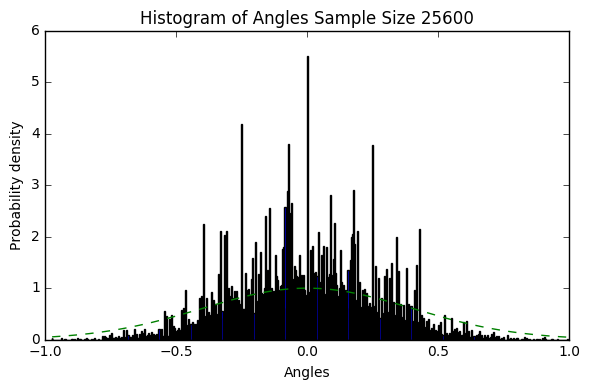

In [36]:
_angle_distribution(
    "angle_distribution_generator_exclude_duplicated_small_angles_30_40_30", 100, 256,
    filter_method=drive_record_filter_exclude_small_angles,
    left_percentage=35,
    right_percentage=35
).show()

batch 0 / 100
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image retur

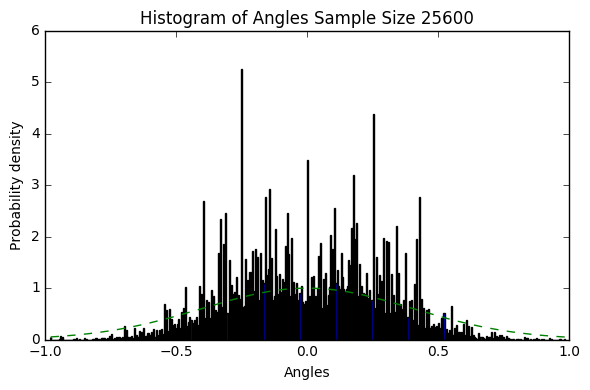

In [32]:
_angle_distribution(
    "angle_distribution_generator_exclude_duplicated_small_angles_40_20_40", 100, 256,
    filter_method=drive_record_filter_exclude_small_angles,
    left_percentage=40,
    right_percentage=40
).show()

batch 0 / 100
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image retur

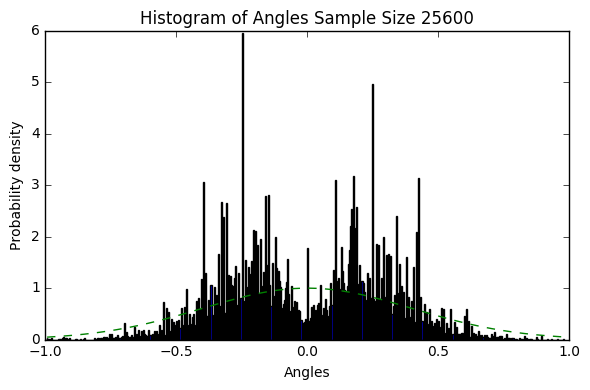

In [33]:
_angle_distribution(
    "angle_distribution_generator_exclude_duplicated_small_angles_45_10_45", 100, 256,
    filter_method=drive_record_filter_exclude_small_angles,
    left_percentage=45,
    right_percentage=45
).show()

batch 0 / 100
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image retur

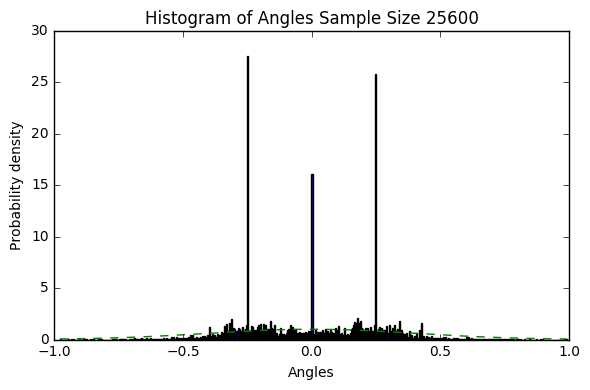

In [35]:
_angle_distribution(
    "drive_record_filter_include_all_45_10_45", 100, 256,
    filter_method=drive_record_filter_include_all,
    left_percentage=40,
    right_percentage=40
).show()

batch 0 / 100
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image returned
WARNING Image is smaller then shift size, original image retur

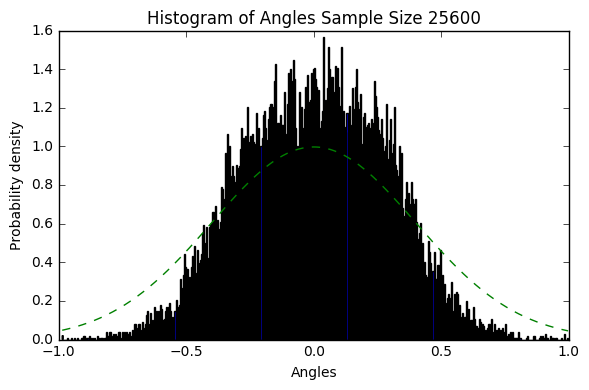

In [12]:
# the training sample size dropped from 24100 to 11824, half of the valuable data has gone
# what if some how we can use that data?
def test_angle_distribution_generator_45_10_45_pipe_line():
    data_set = create_real_dataset(filter_method=drive_record_filter_include_all)
    allocator = AngleTypeWithZeroRecordAllocator(data_set, 35, 35, 6, 3, 3, 0.25)
    generator = pipe_line_generators(
        shift_image_generator(angle_offset_pre_pixel=0.002),
        flip_generator,
        brightness_image_generator(0.25)
    )
    _angle_distribution(
        "angle_distribution_generator_exclude_duplicated_small_angles_40_20_40_pipe_line", 100, 256,
        allocator=allocator.allocate,
        left_percentage=40,
        right_percentage=40,
        angle_offset_pre_pixel=0.006,
        generator=generator
    )
    
test_angle_distribution_generator_45_10_45_pipe_line()